In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (10,7))
%matplotlib inline
sns.set_palette('Accent')     #Coloquei uma paleta de cores
sns.set_style('darkgrid') 

In [2]:
df_2018 = pd.read_csv('dados/despesa_ceaps_2018_alterado.csv', sep =';')
df_2018.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace= True)
df_anual = df_2018.groupby(by='DATA')['VALOR_REEMBOLSADO'].agg({'sum'})
for ano in [2019,2020,2021]:
    dfano = pd.read_csv('dados/despesa_ceaps_'+str(ano)+'_alterado.csv', sep =';')
    dfano.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace = True)
    dfnext = dfano.groupby(by='DATA')['VALOR_REEMBOLSADO'].agg({'sum'})
    df_anual = pd.concat((df_anual,dfnext),axis = 0)

In [3]:
df_anual['data_type'] = df_anual.index
df_anual['data'] = df_anual.index
df_anual

,sum,data_type,data
DATA,,,
01/01/2018,15421.17,01/01/2018,01/01/2018
01/02/2018,207984.60,01/02/2018,01/02/2018
01/03/2018,220852.70,01/03/2018,01/03/2018
01/04/2018,39531.06,01/04/2018,01/04/2018
01/05/2018,37932.91,01/05/2018,01/05/2018
...,...,...,...
31/05/2021,96888.75,31/05/2021,31/05/2021
31/07/2021,60921.02,31/07/2021,31/07/2021
31/08/2021,138769.46,31/08/2021,31/08/2021


In [4]:
df_anual['data_type'] = pd.to_datetime(df_anual['data_type'])

In [5]:
df_anual.head()

,sum,data_type,data
DATA,,,
01/01/2018,15421.17,2018-01-01,01/01/2018
01/02/2018,207984.60,2018-01-02,01/02/2018
01/03/2018,220852.70,2018-01-03,01/03/2018
01/04/2018,39531.06,2018-01-04,01/04/2018
01/05/2018,37932.91,2018-01-05,01/05/2018


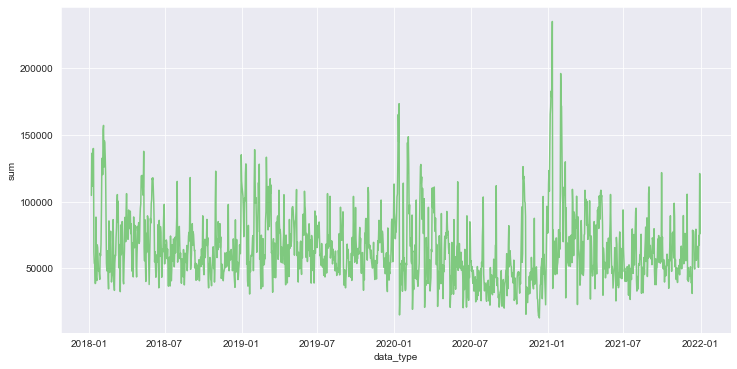

In [6]:
ax = sns.lineplot(x = 'data_type', y =df_anual['sum'].rolling(7).mean(), data = df_anual)
ax.figure.set_size_inches(12,6)
ax=ax

## importando modelos regressão linear

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # modelo
import datetime as dt
from sklearn.metrics import mean_squared_error


## Modelo Arima

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [42]:
df_2018 = pd.read_csv('dados/despesa_ceaps_2018_alterado.csv', sep =';')
df_2018.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace= True)
df_anualM = df_2018.groupby(by='DATA')['VALOR_REEMBOLSADO'].agg({'sum'})
for ano in [2019,2020,2021]:
    dfano = pd.read_csv('dados/despesa_ceaps_'+str(ano)+'_alterado.csv', sep =';')
    dfano.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace = True)
    dfnext = dfano.groupby(by='DATA')['VALOR_REEMBOLSADO'].agg({'sum'})
    df_anualM = pd.concat((df_anualM,dfnext),axis = 0)
df_anualM['media_movel'] = df_anualM['sum'].rolling(7).mean()

In [43]:
df_anualM.head(14)

,sum,media_movel
DATA,,
01/01/2018,15421.17,NaN
01/02/2018,207984.60,NaN
01/03/2018,220852.70,NaN
01/04/2018,39531.06,NaN
01/05/2018,37932.91,NaN
01/06/2018,158715.93,NaN
01/07/2018,51829.37,104609.677143
01/08/2018,237002.71,136264.182857
01/09/2018,41142.51,112429.598571


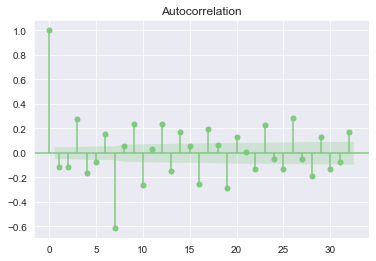

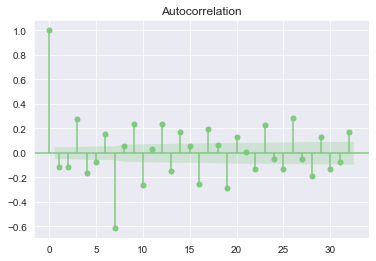

In [44]:
plot_acf(df_anualM['media_movel'].diff().dropna())

In [45]:
result = adfuller(df_anualM['media_movel'].dropna())
result[1]

0.0003741578473629058

d = 1

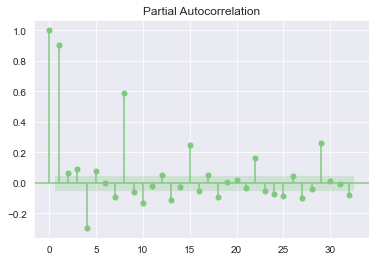

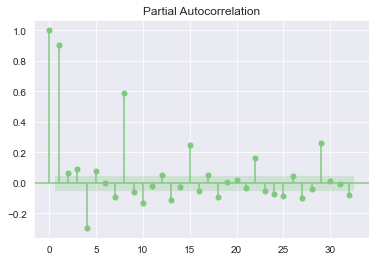

In [46]:
plot_pacf(df_anualM['media_movel'].dropna())

p = 2, q = 2 ou 3

In [47]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = df_anualM

model = pm.auto_arima(df['media_movel'].dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=31244.783, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36572.440, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=31265.092, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=35551.279, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=31267.378, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=31238.667, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=35339.372, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=31214.367, Time=0.51 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=30914.581, Time=1.63 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=31179.482, Time=0.36 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=30903.034, Time=1.94 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=31083.805, Time=1.09 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=30861.602, Time=1.73 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(3,0,2)(0,0,0)[0] i

In [48]:
arima_model = ARIMA(df_anualM['media_movel'].dropna(),order=(3,0,3))
model = arima_model.fit()
print(model.summary())

C:\Users\kaue\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kaue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

                              ARMA Model Results                              
Dep. Variable:            media_movel   No. Observations:                 1455
Model:                     ARMA(3, 3)   Log Likelihood              -15402.722
Method:                       css-mle   S.D. of innovations           9565.047
Date:                Wed, 20 Apr 2022   AIC                          30821.444
Time:                        15:47:42   BIC                          30863.707
Sample:                             0   HQIC                         30837.213
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.449e+04   3182.701     20.264      0.000    5.83e+04    7.07e+04
ar.L1.media_movel    -0.1882      0.014    -13.038      0.000      -0.216      -0.160
ar.L2.media_movel     0.

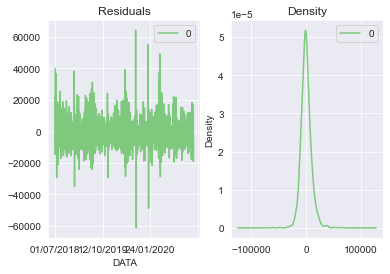

In [49]:
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Figure size 720x720 with 0 Axes>

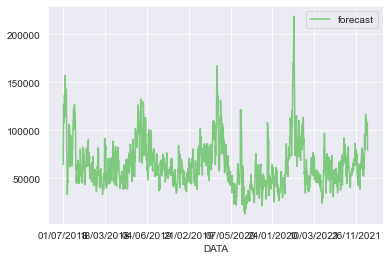

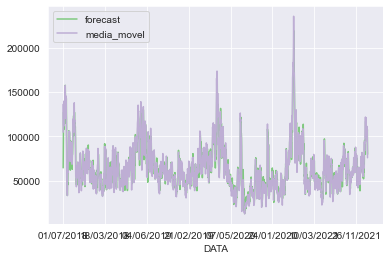

In [50]:
plt.figure(figsize = (10,10))
model.plot_predict(dynamic=False, plot_insample = False)
model.plot_predict(dynamic=False)
plt.show()

C:\Users\kaue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\kaue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


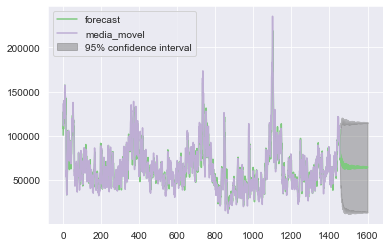

In [51]:
model.plot_predict(1,1600)
plt.show()

In [52]:
df2022 = pd.read_csv('dados/despesa_ceaps_2022_alterado.csv', sep =';')
df2022.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace= True)
df2022 = df2022.groupby(by='DATA')['VALOR_REEMBOLSADO'].agg({'sum'})
df2022['data'] = df2022.index
df2022['data'] = pd.to_datetime(df2022['data'])

In [53]:
fc, se, conf = model.forecast(123, alpha = 0.05)
fc_series = pd.Series(fc, df2022.index)
lower_series = pd.Series(conf[:,0],df2022.index)
upper_series = pd.Series(conf[:,1],df2022.index)
fc_series

DATA
01/01/2022    82691.316283
01/02/2022    75867.617189
01/03/2022    72508.924482
01/04/2022    79577.082550
02/01/2022    72059.084774
                  ...     
29/12/2022    63721.808166
30/01/2022    65312.940842
30/03/2022    64343.859882
31/01/2022    63866.485025
31/03/2022    65334.411043
Length: 123, dtype: float64

In [54]:
teste = df2022['sum'].rolling(7).mean().dropna()

In [55]:
teste = np.array(teste)
teste.shape

(117,)

In [66]:
ticks = df2022.index[0::4]
ticks

Index(['01/01/2022', '02/01/2022', '03/01/2022', '03/09/2022', '04/04/2022',
       '05/04/2022', '06/04/2022', '07/03/2022', '08/02/2022', '09/01/2022',
       '09/12/2022', '10/12/2022', '11/04/2022', '12/04/2022', '13/12/2022',
       '14/12/2022', '16/01/2022', '16/12/2022', '17/12/2022', '18/12/2022',
       '20/01/2022', '21/01/2022', '22/01/2022', '23/01/2022', '24/01/2022',
       '25/02/2022', '26/02/2022', '27/03/2022', '28/03/2022', '29/07/2022',
       '30/03/2022'],
      dtype='object', name='DATA')

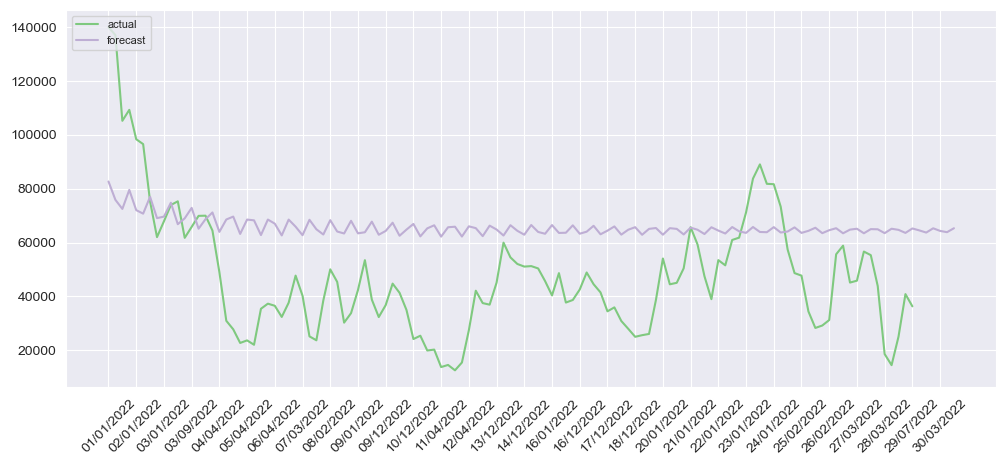

In [68]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(teste , label='actual')
plt.plot(fc_series, label='forecast')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(ticks, rotation = 45)
plt.savefig('dados/imagens/previsão_2022.png', dpi = 300)
plt.show()

In [24]:
forecast2022 = model.forecast(steps = 117)[0]

## O mês seguinte é a média dos últimos três meses?

In [25]:
df_2018 = pd.read_csv('dados/despesa_ceaps_2018_alterado.csv', sep =';')
df_2018.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace= True)
df_anual = df_2018.groupby(by='MES')['VALOR_REEMBOLSADO'].agg({'mean'})
for ano in [2019,2020,2021]:
    dfano = pd.read_csv('dados/despesa_ceaps_'+str(ano)+'_alterado.csv', sep =';')
    dfano.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace = True)
    dfnext = dfano.groupby(by='MES')['VALOR_REEMBOLSADO'].agg({'mean'})
    df_anual = pd.concat((df_anual,dfnext),axis = 0)

In [26]:
df_mensal = df_anual.groupby(by= 'MES')['mean'].agg({'mean','std'})

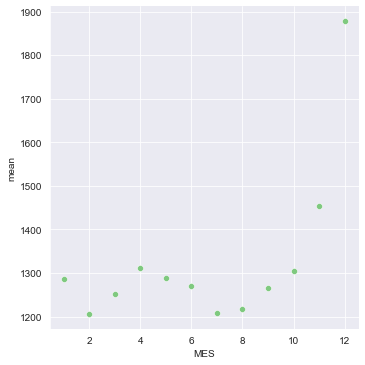

In [27]:
sns.relplot(x = df_mensal.index, y = 'mean', data = df_mensal)

In [28]:
x = np.array(df_mensal.index).reshape(-1,1)
y = np.array(df_mensal['mean']).reshape(-1,1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.35, random_state = 42)
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [30]:
r2_train = regr.score(x_train, y_train)
print('R2 no set de treino: %.2f' % r2_train)

R2 no set de treino: 0.57


In [31]:
coef = regr.coef_
interct = regr.intercept_

In [32]:
ytested = x*coef + interct 

In [33]:
ytested

array([[1079.23784081],
       [1132.32142227],
       [1185.40500373],
       [1238.48858519],
       [1291.57216665],
       [1344.65574811],
       [1397.73932957],
       [1450.82291103],
       [1503.90649249],
       [1556.99007395],
       [1610.07365541],
       [1663.15723687]])

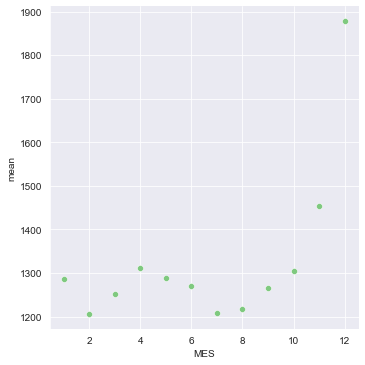

In [34]:
sns.relplot(x = df_mensal.index, y = 'mean', data = df_mensal)

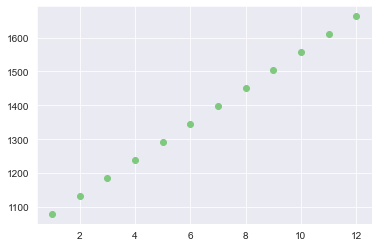

In [35]:
plt.scatter(x = df_mensal.index, y = ytested.reshape(-1,1))

In [36]:
r2 = np.sqrt(mean_squared_error(y,ytested)).round(2)
print(r2)

169.39


In [37]:
np.mean((np.abs((y - ytested)/y))*100)

11.180019361508355

## Será que o modelo acerta somente para 2019

In [38]:
df_anos = pd.read_csv('dados/despesa_ceaps_2019_alterado.csv', sep =';')
df_anos.drop(columns = ['SENADOR','TIPO_DESPESA'],inplace= True)
df_anos = df_anos.groupby(by='MES')['VALOR_REEMBOLSADO'].agg({'mean'})
yanos = np.array(df_anos['mean'])
np.mean((np.abs((yanos - ytested)/yanos))*100)

20.978453464907695